In [2]:
import numpy as np
import pandas as pd



In [4]:
%pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f7553ed24a5938ae65eedb78325a3bbb45437034a3c5b293684f6cdef8d3623c
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
     

In [5]:
from matplotlib import pyplot as plt
from matplotlib import style
from ydata_profiling import ProfileReport

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
passengers = pd.read_csv('/content/titanic.csv')

In [8]:
passengers.head(5)

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [9]:
passengers.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [10]:
passengers[passengers['Survived']==1][0:5]

PassengerId  Survived  Pclass  \
1           893         1       3   
4           896         1       3   
6           898         1       3   
8           900         1       3   
12          904         1       1   

                                             Name     Sex   Age  SibSp  Parch  \
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
6                            Connolly, Miss. Kate  female  30.0      0      0   
8       Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female  18.0      0      0   
12  Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female  23.0      1      0   

     Ticket     Fare Cabin Embarked  
1    363272   7.0000   NaN        S  
4   3101298  12.2875   NaN        S  
6    330972   7.6292   NaN        Q  
8      2657   7.2292   NaN        C  
12    21228  82.2667   B45        S

In [11]:
(passengers['Survived']==1).sum()

np.int64(152)

In [12]:
survived = passengers[passengers['Survived']==1]

In [13]:
survived['Pclass'].value_counts().keys()

Index([3, 1, 2], dtype='int64', name='Pclass')

In [14]:
survived['Pclass'].value_counts().values

array([72, 50, 30])

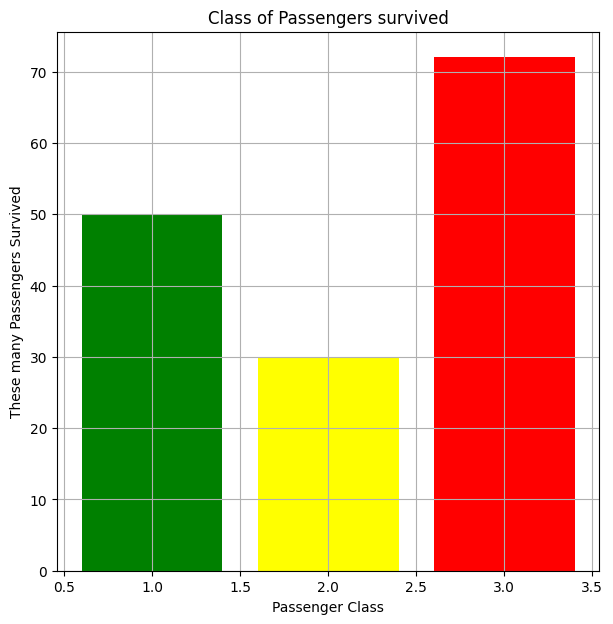

In [15]:
plt.figure(figsize=(7,7))
plt.xlabel('Passenger Class')
plt.ylabel('These many Passengers Survived')
plt.yticks()
plt.grid()
plt.title('Class of Passengers survived')
plt.bar(survived['Pclass'].value_counts().keys(),survived['Pclass'].value_counts().values,color=['red','green','yellow'])
plt.show()

In [16]:
(passengers['Sex']=='female').sum()

np.int64(152)

In [17]:
(survived['Sex']=='female').sum() and (passengers['Survived']==1).sum()

np.int64(152)

In [18]:
(survived['Sex']=='male').sum() and (passengers['Survived']==1).sum()

np.int64(0)

In [19]:
passengers[['Name','Age']]

Name   Age
0                                Kelly, Mr. James  34.5
1                Wilkes, Mrs. James (Ellen Needs)  47.0
2                       Myles, Mr. Thomas Francis  62.0
3                                Wirz, Mr. Albert  27.0
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0
..                                            ...   ...
413                            Spector, Mr. Woolf   NaN
414                  Oliva y Ocana, Dona. Fermina  39.0
415                  Saether, Mr. Simon Sivertsen  38.5
416                           Ware, Mr. Frederick   NaN
417                      Peter, Master. Michael J   NaN

[418 rows x 2 columns]

In [20]:
(passengers['Age'] <18).sum()

np.int64(41)

In [21]:
passengers[passengers['PassengerId'] == 940]

PassengerId  Survived  Pclass  \
48          940         1       1   

                                               Name     Sex   Age  SibSp  \
48  Bucknell, Mrs. William Robert (Emma Eliza Ward)  female  60.0      0   

    Parch Ticket     Fare Cabin Embarked  
48      0  11813  76.2917   D15        C

In [22]:
bins = [-np.inf,17, 39, 59, np.inf]
labels = ["Children","Youth","MiddleAged","SeniorCitizens"]
passengers['AgeGrp'] = pd.cut(passengers['Age'], bins=bins, labels=labels)

In [23]:
passengers['AgeGrp'].value_counts().keys()

CategoricalIndex(['Youth', 'MiddleAged', 'Children', 'SeniorCitizens'], categories=['Children', 'Youth', 'MiddleAged', 'SeniorCitizens'], ordered=True, dtype='category', name='AgeGrp')

In [24]:
passengers['AgeGrp'].value_counts().values

array([209,  68,  41,  14])

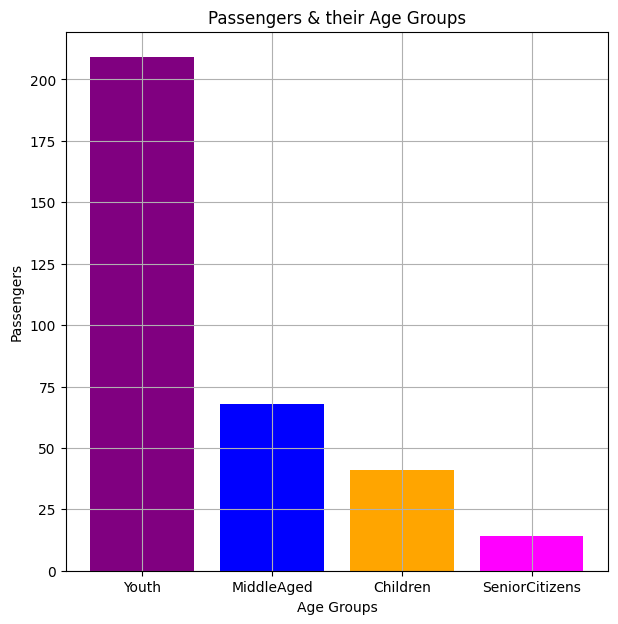

In [25]:
plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Passengers')
plt.yticks()
plt.grid()
plt.title('Passengers & their Age Groups')
plt.bar(passengers['AgeGrp'].value_counts().keys(),passengers['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.show()

In [26]:
bins = [-np.inf,17, 39, 59, np.inf]
labels = ["Children","Youth","MiddleAged","SeniorCitizens"]
survived['AgeGrp'] = pd.cut(survived['Age'], bins=bins, labels=labels)

/tmp/ipython-input-1715583400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived['AgeGrp'] = pd.cut(survived['Age'], bins=bins, labels=labels)


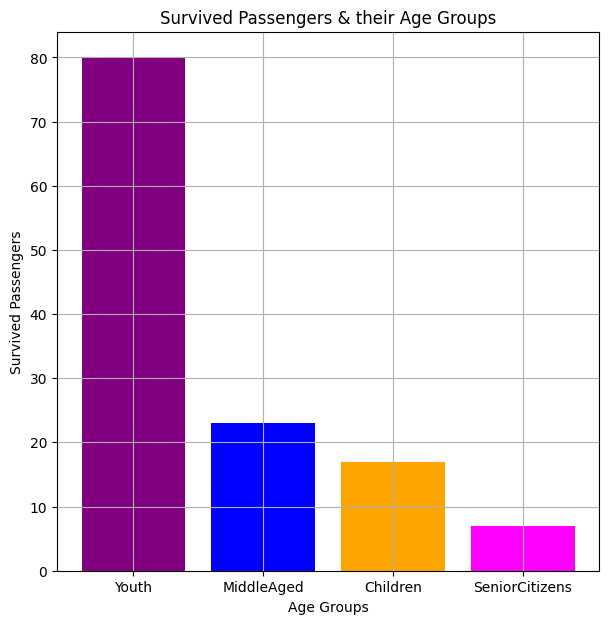

In [27]:
plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Survived Passengers')
plt.yticks()
plt.grid()
plt.title('Survived Passengers & their Age Groups')
plt.bar(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.show()

/tmp/ipython-input-2954421717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead['AgeGrp'] = pd.cut(dead['Age'], bins=bins, labels=labels)


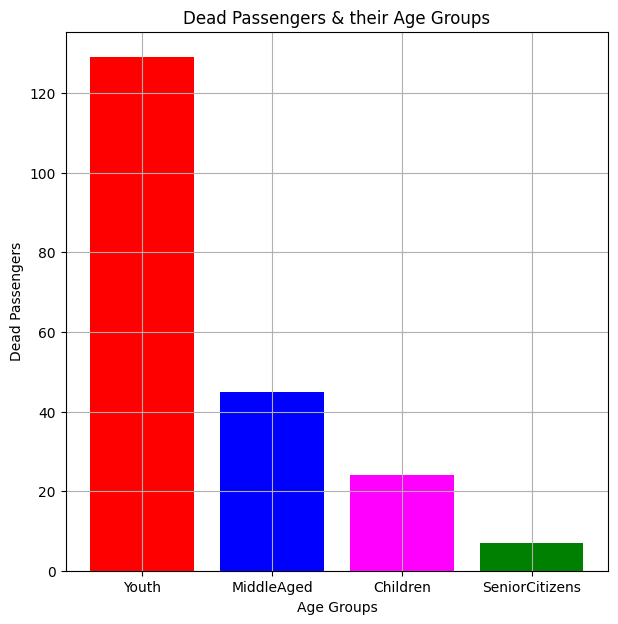

In [28]:
dead = passengers[passengers['Survived']==0]

bins = [-np.inf,17, 39, 59, np.inf]
labels = ["Children","Youth","MiddleAged","SeniorCitizens"]
dead['AgeGrp'] = pd.cut(dead['Age'], bins=bins, labels=labels)

plt.figure(figsize=(7,7))
plt.xlabel('Age Groups')
plt.ylabel('Dead Passengers')
plt.yticks()
plt.grid()
plt.title('Dead Passengers & their Age Groups')
plt.bar(dead['AgeGrp'].value_counts().keys(),dead['AgeGrp'].value_counts(),color=['red','blue','magenta','green'])
plt.show()

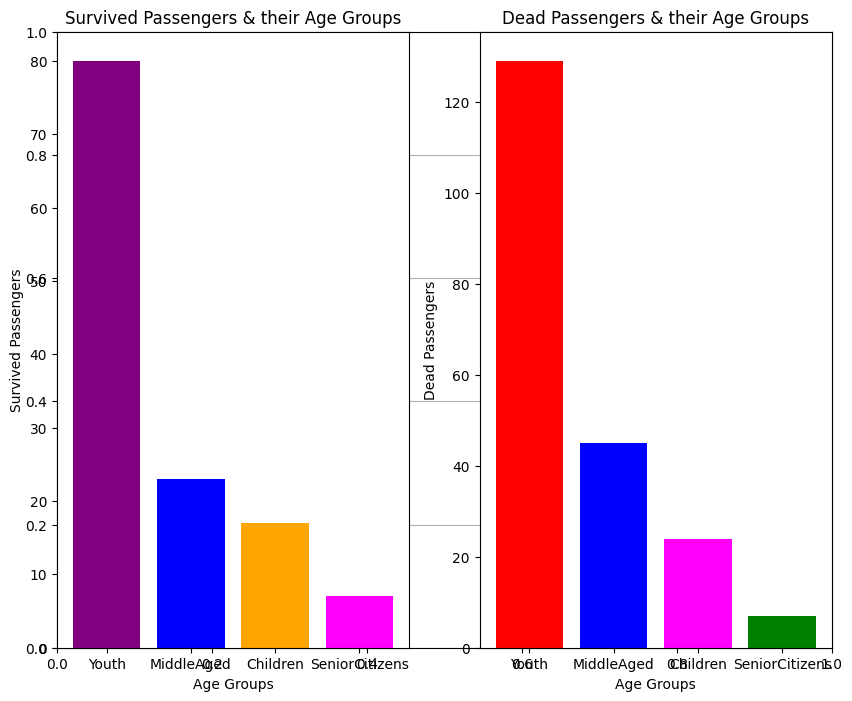

In [30]:
plt.figure(figsize=(10,8))

plt.grid()

plt.subplot(1, 2, 1)
plt.xlabel('Age Groups')
plt.ylabel('Survived Passengers')
plt.title('Survived Passengers & their Age Groups')
plt.bar(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.subplot(1, 2, 2)
plt.xlabel('Age Groups')
plt.ylabel('Dead Passengers')
plt.title('Dead Passengers & their Age Groups')
plt.bar(dead['AgeGrp'].value_counts().keys(),dead['AgeGrp'].value_counts(),color=['red','blue','magenta','green'])
plt.show()

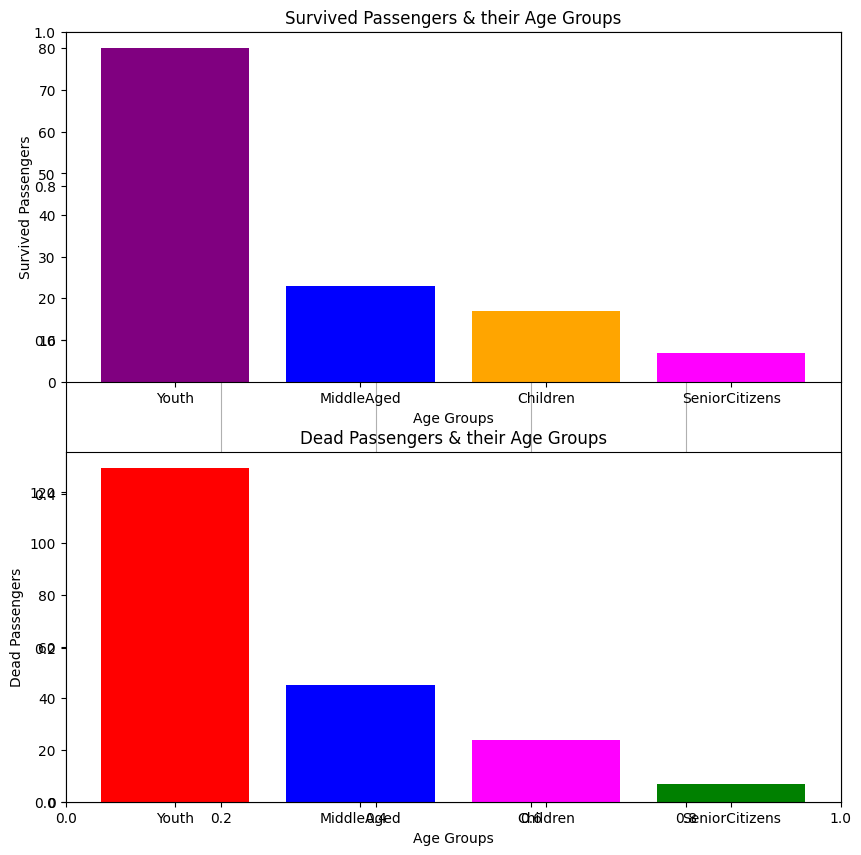

In [31]:
plt.figure(figsize=(10,10))

plt.grid()

plt.subplot(2, 1, 1)
plt.xlabel('Age Groups')
plt.ylabel('Survived Passengers')
plt.title('Survived Passengers & their Age Groups')
plt.bar(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(),color=['purple','blue','orange','magenta'])
plt.subplot(2, 1, 2)
plt.xlabel('Age Groups')
plt.ylabel('Dead Passengers')
plt.title('Dead Passengers & their Age Groups')
plt.bar(dead['AgeGrp'].value_counts().keys(),dead['AgeGrp'].value_counts(),color=['red','blue','magenta','green'])
plt.show()

In [32]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


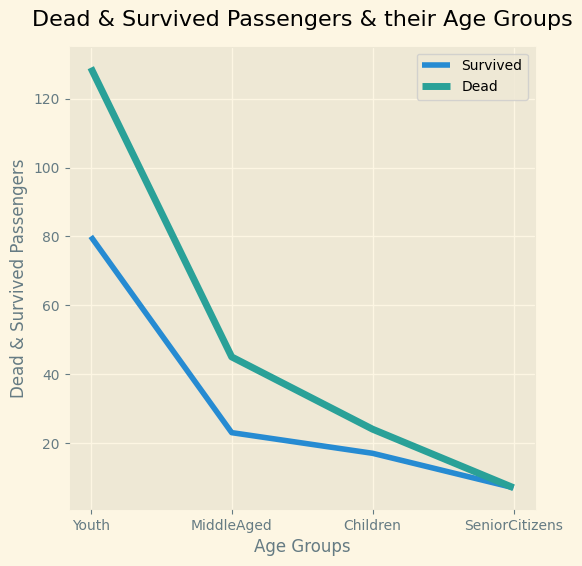

In [33]:
style.use("Solarize_Light2")
plt.figure(figsize=(6,6))
plt.plot(survived['AgeGrp'].value_counts().keys(),survived['AgeGrp'].value_counts(), label="Survived", linewidth=4)
plt.plot(dead['AgeGrp'].value_counts().keys(),dead['AgeGrp'].value_counts(), label="Dead", linewidth=5)

plt.xlabel('Age Groups')
plt.ylabel('Dead & Survived Passengers')
plt.title("Dead & Survived Passengers & their Age Groups",pad=15)
plt.legend()

plt.show()

In [34]:
passengers.head(5)

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked          AgeGrp  
0   330911   7.8292   NaN        Q           Youth  
1   363272   7.0000   NaN        S      MiddleAged  
2   240276   9.6875   NaN        Q  SeniorCitizens  
3   315154   8.6625   NaN        S           Youth  
4  3101298  12.2875   NaN        S           Youth

In [35]:
passengers[['Name','Cabin']]

Name Cabin
0                                Kelly, Mr. James   NaN
1                Wilkes, Mrs. James (Ellen Needs)   NaN
2                       Myles, Mr. Thomas Francis   NaN
3                                Wirz, Mr. Albert   NaN
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)   NaN
..                                            ...   ...
413                            Spector, Mr. Woolf   NaN
414                  Oliva y Ocana, Dona. Fermina  C105
415                  Saether, Mr. Simon Sivertsen   NaN
416                           Ware, Mr. Frederick   NaN
417                      Peter, Master. Michael J   NaN

[418 rows x 2 columns]

In [36]:
passengers['Cabin'].isnull().sum()

np.int64(327)

In [37]:
passengers['Cabin'].notnull().sum()

np.int64(91)

In [38]:
(passengers['Sex']=='male').sum()

np.int64(266)

In [39]:
((passengers['Cabin'].notnull()) & (passengers['Sex']=='male')).sum()

np.int64(47)

In [40]:
((passengers['Cabin'].notnull()) & (passengers['Sex']=='female')).sum()

np.int64(44)

In [41]:
passengers['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

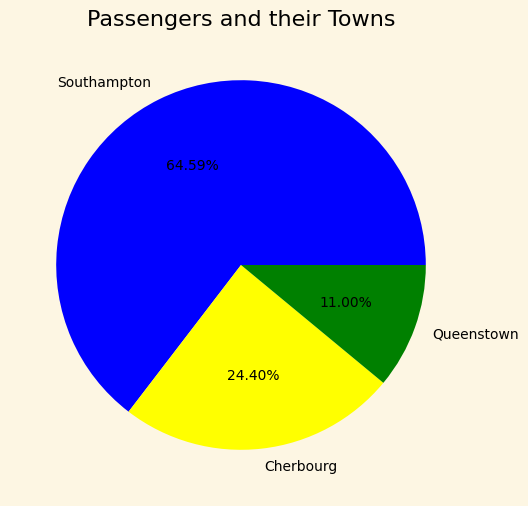

In [42]:
plt.figure(figsize=(6,6))
plt.title('Passengers and their Towns')

plt.pie(passengers['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['blue','yellow','green'])
plt.show()

In [43]:
passengers[passengers['Embarked']=='S']


PassengerId  Survived  Pclass  \
1            893         1       3   
3            895         0       3   
4            896         1       3   
5            897         0       3   
7            899         0       2   
..           ...       ...     ...   
409         1301         1       3   
412         1304         1       3   
413         1305         0       3   
415         1307         0       3   
416         1308         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
5                      Svensson, Mr. Johan Cervin    male  14.0      0      0   
7                    Caldwell, Mr. Albert Francis    male  26.0      1      1   
..                                            ...     ...   ...    ...    ...   
409                     Peacock, Miss. Treasteall  female   3.0      1      1   
412                Henriksson, Miss. Jenny Lovisa  female  28.0      0      0   
413                            Spector, Mr. Woolf    male   NaN      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   

                 Ticket     Fare Cabin Embarked      AgeGrp  
1                363272   7.0000   NaN        S  MiddleAged  
3                315154   8.6625   NaN        S       Youth  
4               3101298  12.2875   NaN        S       Youth  
5                  7538   9.2250   NaN        S    Children  
7                248738  29.0000   NaN        S       Youth  
..                  ...      ...   ...      ...         ...  
409  SOTON/O.Q. 3101315  13.7750   NaN        S    Children  
412              347086   7.7750   NaN        S       Youth  
413           A.5. 3236   8.0500   NaN        S         NaN  
415  SOTON/O.Q. 3101262   7.2500   NaN        S       Youth  
416              359309   8.0500   NaN        S         NaN  

[270 rows x 13 columns]

In [44]:
dead['Embarked'].value_counts()

Embarked
S    182
C     62
Q     22
Name: count, dtype: int64

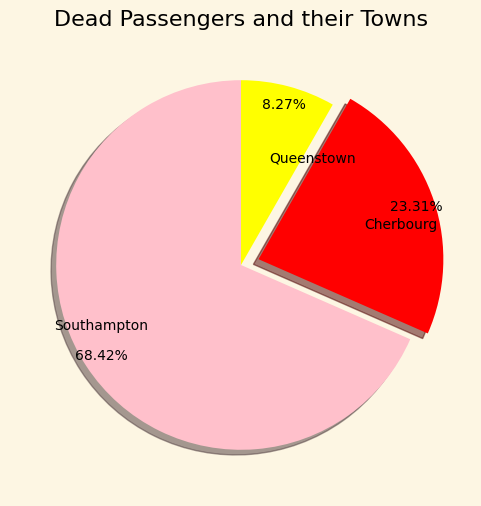

In [45]:
plt.figure(figsize=(6,6))
plt.title('Dead Passengers and their Towns')

explode = (0, 0.1, 0)

plt.pie(dead['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['pink','red','yellow'],explode=explode,shadow=True,startangle=90,labeldistance=0.6, pctdistance=0.9)
plt.show()

In [46]:
survived['Embarked'].value_counts()

Embarked
S    88
C    40
Q    24
Name: count, dtype: int64

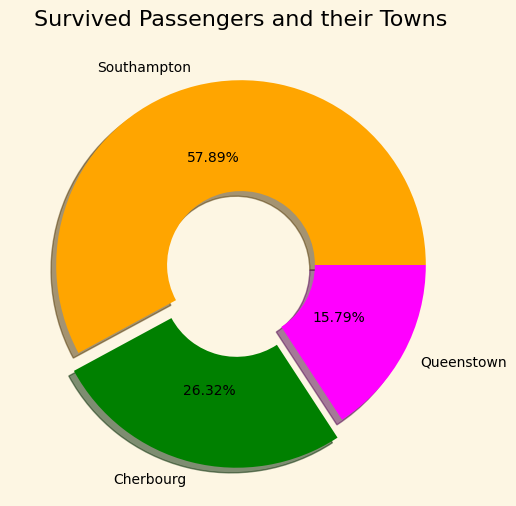

In [47]:
plt.figure(figsize=(6,6))
plt.title('Survived Passengers and their Towns')

explode = (0, 0.1, 0)

plt.pie(survived['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'], autopct ='%1.02f%%', colors=['orange','green','magenta'],wedgeprops={'width':0.6}, explode=explode, shadow=True)
plt.show()

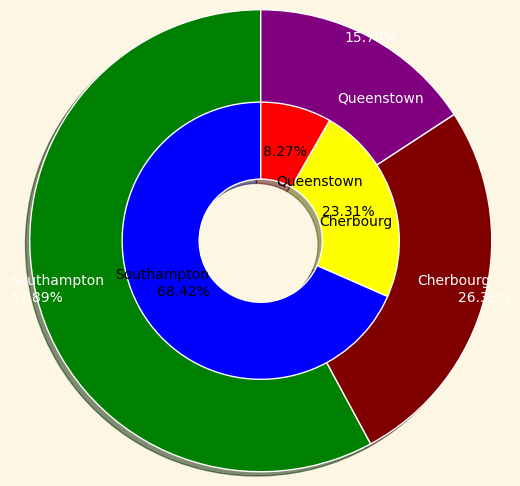

In [48]:
plt.figure(figsize=(5,5))

plt.pie(dead['Embarked'].value_counts(),
       radius=1,
       colors=['blue','yellow','red'],
       labels=['Southampton','Cherbourg','Queenstown'],
       textprops={'color':'black'},
        startangle=90,
       wedgeprops=dict(width=0.6, edgecolor='w'),
        autopct ='%1.02f%%',

        labeldistance=0.4,
        shadow=True)
plt.pie(survived['Embarked'].value_counts(),
       radius=1.5,
       colors=['green','maroon','purple'],
        textprops={'color':'white'},
        startangle=90,
       wedgeprops=dict(width=0.6, edgecolor='w'),
        labels=['Southampton','Cherbourg','Queenstown'],
        shadow=True, labeldistance=0.7,autopct ='%1.02f%%',pctdistance=1)

plt.show()

In [49]:
passengers.head(5)

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked          AgeGrp  
0   330911   7.8292   NaN        Q           Youth  
1   363272   7.0000   NaN        S      MiddleAged  
2   240276   9.6875   NaN        Q  SeniorCitizens  
3   315154   8.6625   NaN        S           Youth  
4  3101298  12.2875   NaN        S           Youth

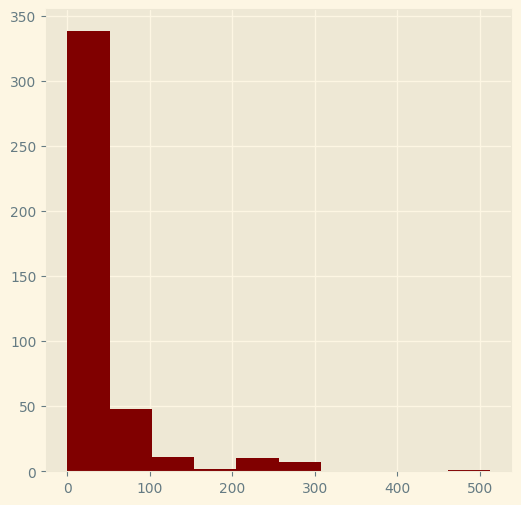

In [50]:
plt.figure(figsize=(6,6))
plt.hist(passengers['Fare'],color='maroon',)
plt.show()

In [51]:
passengers['Fare'].head(20)

0      7.8292
1      7.0000
2      9.6875
3      8.6625
4     12.2875
5      9.2250
6      7.6292
7     29.0000
8      7.2292
9     24.1500
10     7.8958
11    26.0000
12    82.2667
13    26.0000
14    61.1750
15    27.7208
16    12.3500
17     7.2250
18     7.9250
19     7.2250
Name: Fare, dtype: float64

In [52]:
profile = ProfileReport(passengers)

In [53]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 55.99it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]